In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()
len(X_train)

11490434/11490434 [==============================] - 4s 0us/step


60000

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

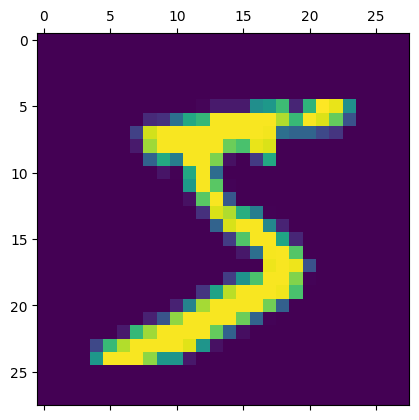

In [5]:
plt.matshow(X_train[0])

### Now we reshape the data(falttening) 

In [6]:
X_train=X_train/255
X_test=X_test/255

In [7]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [8]:
Model= keras.Sequential([
    keras.layers.Dense(100,input_dim=(784),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [9]:
Model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
Model.fit(X_train_flattened,Y_train,epochs=10)


Epoch 1/10


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2807 - accuracy: 0.9201
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1291 - accuracy: 0.9623
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0898 - accuracy: 0.9727
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0675 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0538 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0435 - accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0354 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0289 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0225 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.

### Evaluate accuracy on test dataset 

In [10]:
Model.evaluate(X_test_flattened,Y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0843 - accuracy: 0.9768


[0.08428515493869781, 0.9768000245094299]

### Sample Prediction

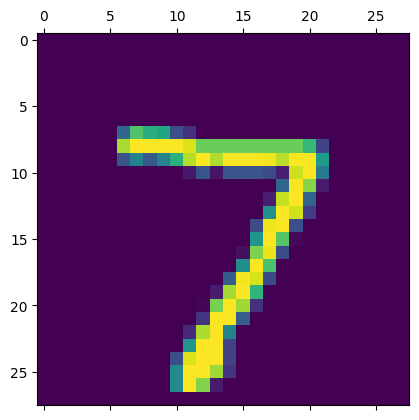

In [11]:
plt.matshow(X_test[0])

In [12]:
Y_predicted=Model.predict(X_test_flattened)
Y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([2.6942065e-02, 7.8720802e-07, 8.3028108e-01, 3.8669705e-01,
       9.4107311e-10, 7.8483013e-04, 1.7100264e-07, 9.9987537e-01,
       1.6336273e-02, 8.1746774e-03], dtype=float32)

In [13]:
#so we are not getting the one integer value thats why we use argmax.it will show us the highest value in that array
np.argmax(Y_predicted[0])

7

### Confusion Matrix

In [14]:
Y_predicted_labels=[np.argmax(i) for i in Y_predicted]

In [15]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)

In [16]:
print(cm)

tf.Tensor(
[[ 969    0    1    1    2    1    1    1    2    2]
 [   0 1124    4    1    0    0    1    2    3    0]
 [   3    0 1015    2    3    0    1    6    2    0]
 [   1    0    8  984    1    3    0    3    6    4]
 [   0    0    4    0  964    0    3    3    1    7]
 [   2    0    0   19    1  858    3    1    6    2]
 [   5    3    3    1    7    4  935    0    0    0]
 [   5    4   14    0    1    0    0  997    3    4]
 [   3    0    3    4    4    2    3    4  946    5]
 [   2    2    1    5    9    2    1   10    1  976]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'true values')

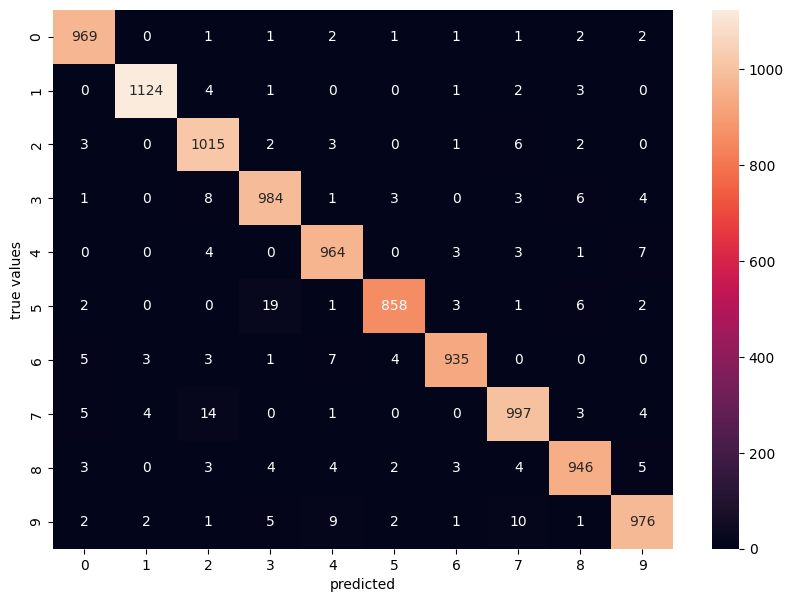

In [17]:
#now visualize
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('true values')